# Notebook 05: Particional vs Densidad

En este notebook se va a hacer una comparación de un algoritmo particional, como KMeans, frente a un algoritmo basado en densidades, como DBSCAN. Además, se va a implementar el algoritmo DBSCAN de forma manual para comprender y visualizar su funcionamiento.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf # Solamente lo utilizamos para descargar los datos

Primero generamos los datos. Vamos a generar muchos puntos en dos areas concentradas y luego algunos puntos aleatorios.

In [ ]:
media_1 = 1.5
media_2 = -1.0
std_1 = 0.3
std_2 = 0.2
grupo_1 = np.random.randn(1000, 2) * std_1 + media_1
grupo_2 = np.random.randn(1000, 2) * std_2 + media_2
grupo_3 = np.random.randn(40, 2)

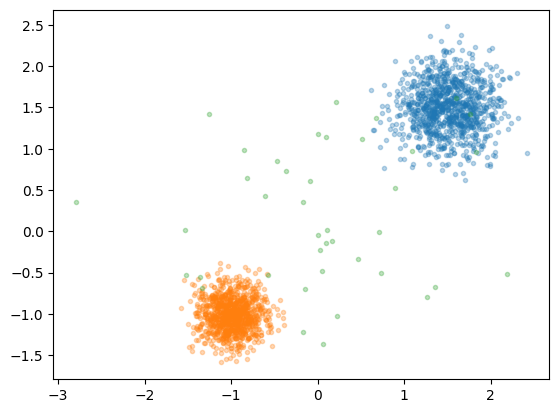

In [ ]:
plt.plot(grupo_1[:, 0], grupo_1[:, 1], '.', alpha=0.3)
plt.plot(grupo_2[:, 0], grupo_2[:, 1], '.', alpha=0.3)
plt.plot(grupo_3[:, 0], grupo_3[:, 1], '.', alpha=0.3)
plt.show()

Concatenando los tres grupos, tenemos nuestro dataset sintético sobre el que mostrar las diferencias entre un dataset particional y un dataset basado en densidades.

In [ ]:
datos = np.concatenate((grupo_1, grupo_2, grupo_3))
datos.shape

(2040, 2)

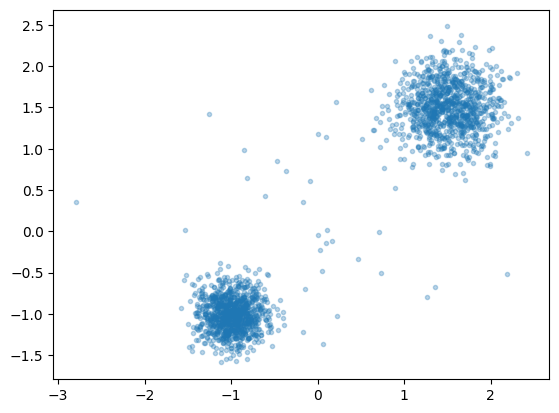

In [ ]:
plt.plot(datos[:, 0], datos[:, 1], '.', alpha=0.3)
plt.show()

En este  notebook vamos a seguir el orden inverso. Primero veremos la comparación entre los dos tipos de clustering y luego implementaremos DBSCAN de forma manual.

## Particional vs Densidad

In [ ]:
from sklearn.cluster import KMeans, DBSCAN

Primero hacemos el clustering con KMeans.

In [ ]:
kmeans = KMeans(n_clusters=2, n_init=10)
kmeans.fit(datos)
clusters = kmeans.predict(datos)
clusters

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

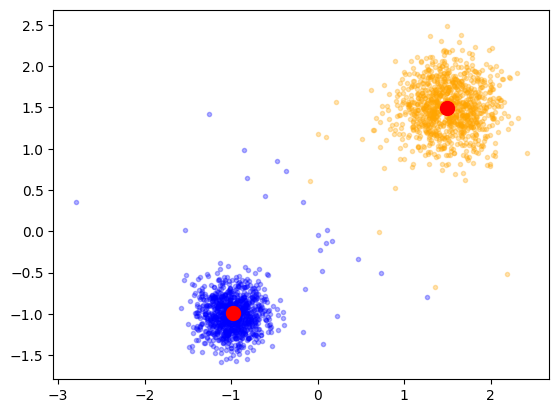

In [ ]:
color = ["orange", "blue"]
for c in range(2):
  plt.plot(datos[clusters==c, 0], datos[clusters==c, 1], '.', alpha=0.3, label="Cluster " + str(c+1), color=color[c])
  plt.plot(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], color="red", marker='o', markersize=10)
plt.show()

Como ya vimos, podemos crear una rejilla de puntos para definir cómo se particiona el espacio según KMeans.

In [ ]:
margen = 0.5
XX, YY = np.meshgrid(np.linspace(datos.min(axis=0)[0] - margen, datos.max(axis=0)[0] + margen, 100), np.linspace(datos.min(axis=0)[1] - margen, datos.max(axis=0)[1] + margen, 100))
points = np.concatenate([XX.reshape(-1, 1), YY.reshape(-1, 1)], axis=1)
labels = kmeans.predict(points)
labels = labels.reshape(XX.shape)

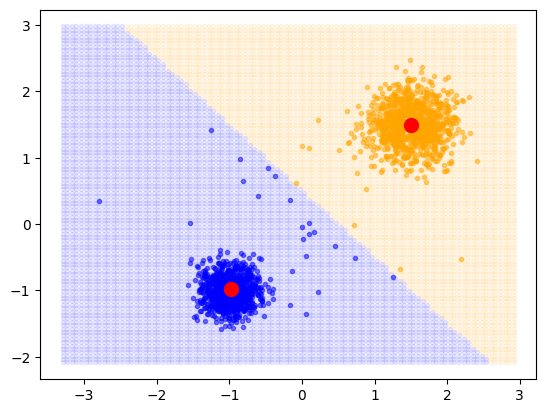

In [ ]:
color = ["orange", "blue"]
for c in np.unique(clusters):
  plt.plot(datos[clusters == c, 0], datos[clusters == c, 1], '.', color=color[c], label="Cluster "+str(c+1), alpha=0.5)
  plt.scatter([kmeans.cluster_centers_[c, 0]], [kmeans.cluster_centers_[c, 1]], color=color[c], edgecolors="black")
  plt.scatter(XX[labels == c], YY[labels == c], color=color[c], marker='.', alpha=0.08)
  plt.plot(kmeans.cluster_centers_[c, 0], kmeans.cluster_centers_[c, 1], color="red", marker='o', markersize=10)
plt.show()

Por otro lado, usemos ahora el algoritmo DBSCAN definiendo los hiperparámetros eps (radio) y min_samples (mínimo de puntos en el radio).

In [ ]:
db = DBSCAN(eps=0.2, min_samples=10)
clusters = db.fit_predict(datos)
clusters

array([ 0,  0, -1, ...,  1, -1, -1])

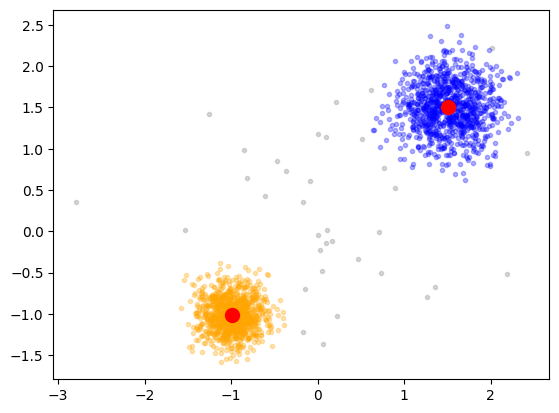

In [ ]:
color = ["blue", "orange", "gray"]
for c in range(-1, 2, 1):
  plt.plot(datos[clusters==c, 0], datos[clusters==c, 1], '.', alpha=0.3, label="Cluster " + str(c+1), color=color[c])
  if c != -1:
    centroide = datos[clusters==c].mean(axis=0)
    plt.plot(centroide[0], centroide[1], color="red", marker='o', markersize=10)
plt.show()

## Implementación manual del algoritmo

In [ ]:
from sklearn.metrics import euclidean_distances

In [ ]:
# FUNCION PARA PINTAR LOS PUNTOS SEGUN EL CLUSTER AL QUE PERTENECEN
def pintar(datos, clusters):
  color = ["blue", "orange", "gray"]
  for c in range(-1, 2, 1):
    plt.plot(datos[clusters==c, 0], datos[clusters==c, 1], '.', alpha=0.3, label="Cluster " + str(c+1), color=color[c])
    if c != -1:
      centroide = datos[clusters==c].mean(axis=0)
      plt.plot(centroide[0], centroide[1], color="red", marker='o', markersize=10)

In [ ]:
# Se definen los hiperparámetros
eps = 0.2
minPts = 10

###############################################
# A PARTIR DE AQUÍ COMIENZA EL ALGORITMO

# Se definen dos variables:
### puntos_visitados: Al principio todo a false (zeros)
### clusters: Al principio todo a -1, todos son ruido
puntos_visitados = np.zeros(len(datos))
clusters = np.ones(len(datos))*-1

# Mientras que queden puntos sin visitar...
while False in puntos_visitados:
  # Selecciono un punto aleatorio de los que no he visitado
  indice_punto_a_visitar = np.random.choice(np.where(puntos_visitados == 0)[0])

  # Voy a definir una pila para hacer una búsqueda en profundidad de todos los vecinos de los vecinos
  # en el caso en que sea punto de núcleo
  puntos_pendientes_de_visitar = [indice_punto_a_visitar]
  nucleo_encontrado = False
  new_cluster = clusters.max()

  pintar(datos, clusters)
  plt.show()

  # Mientras la pila tenga algún elemento...
  while len(puntos_pendientes_de_visitar) > 0:
    # Hago un pop de la pila
    indice_punto_a_visitar = puntos_pendientes_de_visitar[0]
    puntos_pendientes_de_visitar = puntos_pendientes_de_visitar[1:]

    ### Este if es solo para pintar las figuras
    if not nucleo_encontrado:
      pintar(datos, clusters)
      plt.plot(datos[indice_punto_a_visitar, 0], datos[indice_punto_a_visitar, 1], 'o', color="red")
      centro = datos[indice_punto_a_visitar]
      angulos = np.linspace(0, 2*np.pi, 100)
      x = centro[0] + eps * np.cos(angulos)
      y = centro[1] + eps * np.sin(angulos)
      plt.plot(x, y, color="red")
      plt.show()

    # Si el punto ya ha sido visitado, paso al siguiente
    if puntos_visitados[indice_punto_a_visitar]:
      continue

    # Si no ha sido visitado, lo marco como visitado
    puntos_visitados[indice_punto_a_visitar] = True
    # Calculo su distancia a todos los puntos
    distancias = euclidean_distances(datos[indice_punto_a_visitar][None, :], datos)[0] # (2040,)

    ### Aquí hay dos posibilidades, o bien estoy probando a encontrar un nuevo cluster
    ### o bien estoy añadiendo puntos a un cluster que ya he empezado a definir
    ### Si estoy buscando un nuevo cluster, nucleo_encontrado es False
    ### Si estoy añadiendo puntos a un cluster que ya he empezado a construir, nucleo_encontrado es True

    # Si estoy buscando un nuevo cluster
    if not nucleo_encontrado:
      # Cuento el número de puntos dentro del radio
      num_puntos_dentro_del_radio = len(np.where(distancias < eps)[0])
      # Si supero minPts, he encontrado un nuevo nucleo
      if minPts < num_puntos_dentro_del_radio:
        print(" > PUNTO DE NUCLEO ENCONTRADO:", indice_punto_a_visitar)
        ### Pongo la variable nucleo_encontrado a True para saber luego que empiezo a construir el cluster
        nucleo_encontrado = True
        new_cluster += 1
        # Asigno el punto al nuevo cluster
        clusters[indice_punto_a_visitar] = new_cluster
        # Añado todos los vecinos a la pila si no han sido ya visitados
        for ip in np.where(distancias < eps)[0]:
          if not puntos_visitados[ip]:
            puntos_pendientes_de_visitar.append(ip)
      else:
        print(" > PUNTO DE RUIDO ENCONTRADO:", indice_punto_a_visitar)
    # Si estoy añadiendo puntos a un cluster que ya he empezado a construir
    else:
      # Asigno el punto al nuevo cluster
      clusters[indice_punto_a_visitar] = new_cluster
      # Añado todos los vecinos a la pila si no han sido ya visitados
      for ip in np.where(distancias < eps)[0]:
          if not puntos_visitados[ip]:
            puntos_pendientes_de_visitar.append(ip)

    ### En cada vuelta quito los repetidos
    puntos_pendientes_de_visitar = list(set(puntos_pendientes_de_visitar))

Output hidden; open in https://colab.research.google.com to view.

## DBSCAN en MNIST

Descargamos los datos de MNIST

In [ ]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

Dividimos entre 255 para tener los datos entre 0 y 1.

In [ ]:
x_train = x_train / 255
x_test = x_test / 255

Restamos la media para que sea más fácil para el modelo

In [ ]:
x_train = x_train - x_train.mean(axis=0)
x_test = x_test - x_train.mean(axis=0)

Recordamos el aspecto de los datos

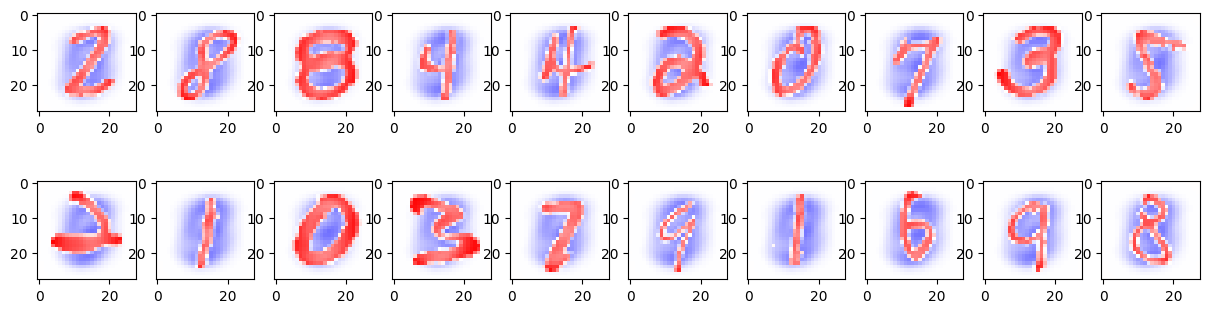

In [ ]:
plt.figure(figsize=(15,4))
for i in range(20):
  plt.subplot(2,10,i+1)
  plt.imshow(x_train[np.random.randint(60000)], cmap="bwr", vmin=-1, vmax=1)
plt.show()

In [ ]:
datos = x_train.reshape(x_train.shape[0], -1)
datos.shape

(60000, 784)

In [ ]:
datos = datos[:10000]
datos.shape

(10000, 784)

In [ ]:
matriz_distancias = euclidean_distances(datos)
matriz_distancias.shape

(10000, 10000)

(array([ 800., 2449., 2439., 1807., 1207.,  697.,  357.,  180.,   50.,
          14.]),
 array([ 8.84537667,  9.28594048,  9.72650429, 10.16706811, 10.60763192,
        11.04819573, 11.48875954, 11.92932336, 12.36988717, 12.81045098,
        13.25101479]),
 <BarContainer object of 10 artists>)

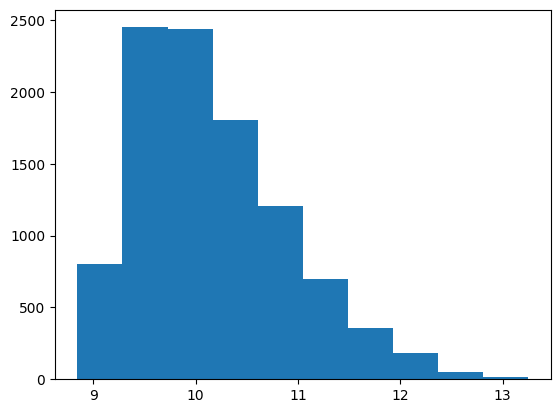

In [ ]:
plt.hist(matriz_distancias.mean(axis=0))

In [ ]:
eps = 4.0
min_puntos = 200

db = DBSCAN(eps=eps, min_samples=min_puntos)
clusters = db.fit_predict(datos)
clusters

array([-1, -1, -1, ..., -1, -1, -1])

In [ ]:
len(np.unique(clusters))

3

<ipython-input-100-e85c224d4532>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,12,1)


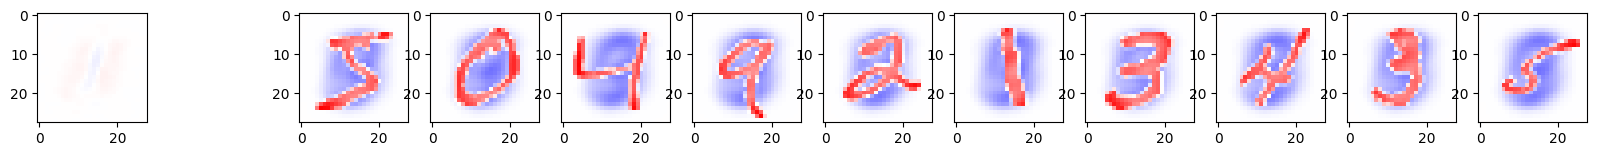

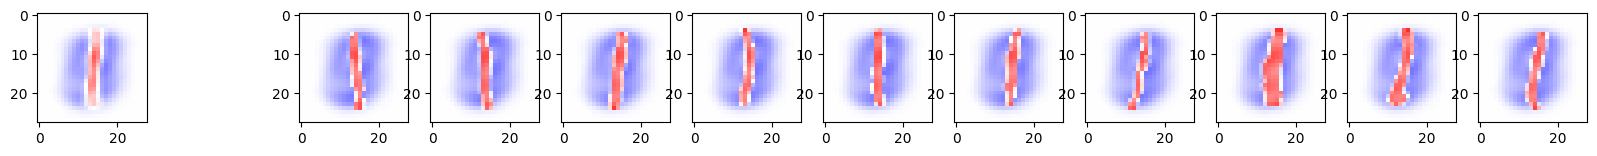

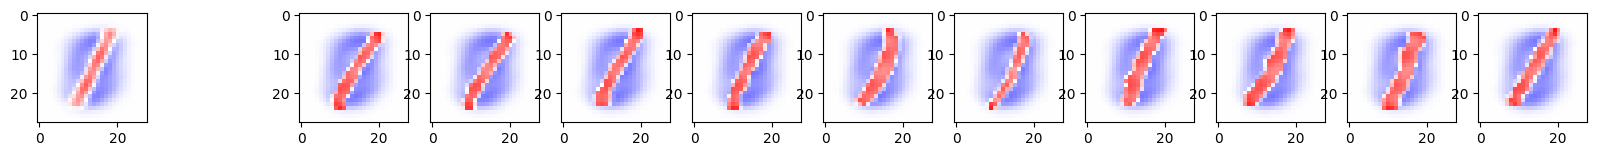

In [ ]:
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  plt.figure(figsize=(20,4))
  plt.title("Cluster " + str(c))
  plt.subplot(1,12,1)
  plt.imshow(x_train[indices].mean(axis=0), cmap="bwr", vmin=-1, vmax=1)
  for i in range(10):
    plt.subplot(1,12,i+3)
    plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
  plt.show()

## DBSCAN iterativo

Una estrategia interesante con el algoritmo DBSCAN es implementarlo de forma iterativa, siguiendo una estrategia de **refinamiento progresivo**. Esta estrategia consiste en una búsqueda iterativa de clusters aumentando el radio de forma lineal:

* Defines un umbral de parada, por ejemplo, el número máximo de puntos de ruido permitido.

* Comienzas la búsqueda en un valor de *eps* determinado, y ejecutas DBSCAN hasta encontrar al menos un cluster no considerado como ruido.

* Los puntos clusterizados los apartas del procedimiento. Si siguen quedando puntos de ruido por encima del umbral de parada, sigue buscando más clusters.

In [ ]:
EPS_INI = 3.5
EPS_INCR = 0.1
MIN_PUNTOS = 200

clusters = np.ones(len(datos))*-1

max_cluster = -1
while (clusters == -1).sum() > 1000:
  print(" > Número de clusters:", len(np.unique(clusters))-1)
  print(" > Datos ruidosos:", (clusters==-1).sum())
  print()
  eps = EPS_INI

  encontrado = False
  while not encontrado:
    #print("   Probando eps", eps)
    db = DBSCAN(eps=eps, min_samples=MIN_PUNTOS)
    clusters_temp = db.fit_predict(datos[clusters == -1])
    num_clusters = len(np.unique(clusters_temp))
    #print("     num clusters", num_clusters)
    if num_clusters > 1:
      encontrado = True
      EPS_INI = eps
    else:
      eps += EPS_INCR

  for c in np.unique(clusters_temp):
    if c >= 0:
      max_cluster += 1
      contador = 0
      for i in range(len(datos)):
        if clusters[i] == -1:
          if clusters_temp[contador] == c:
            clusters[i] = max_cluster
          contador += 1

 > Número de clusters: 0
 > Datos ruidosos: 10000

 > Número de clusters: 2
 > Datos ruidosos: 9434

 > Número de clusters: 3
 > Datos ruidosos: 9232

 > Número de clusters: 4
 > Datos ruidosos: 9032

 > Número de clusters: 5
 > Datos ruidosos: 8832

 > Número de clusters: 6
 > Datos ruidosos: 8421

 > Número de clusters: 7
 > Datos ruidosos: 8214

 > Número de clusters: 8
 > Datos ruidosos: 7894

 > Número de clusters: 9
 > Datos ruidosos: 7582

 > Número de clusters: 10
 > Datos ruidosos: 7301

 > Número de clusters: 11
 > Datos ruidosos: 6752

 > Número de clusters: 14
 > Datos ruidosos: 5944

 > Número de clusters: 16
 > Datos ruidosos: 5549

 > Número de clusters: 19
 > Datos ruidosos: 4702

 > Número de clusters: 20
 > Datos ruidosos: 4493

 > Número de clusters: 22
 > Datos ruidosos: 3924

 > Número de clusters: 23
 > Datos ruidosos: 3580

 > Número de clusters: 24
 > Datos ruidosos: 3374

 > Número de clusters: 25
 > Datos ruidosos: 2868

 > Número de clusters: 26
 > Datos ruid

<ipython-input-93-ab9ec7797adc>:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,11,1)


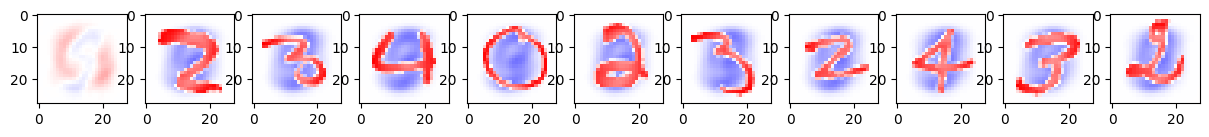

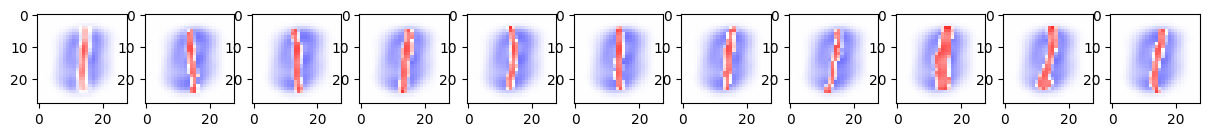

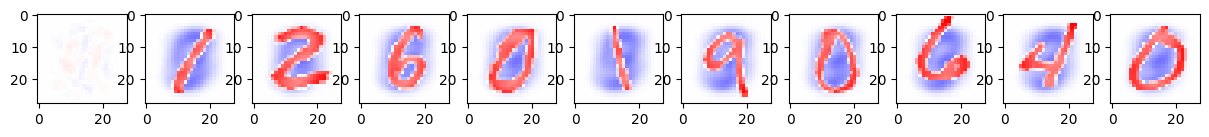

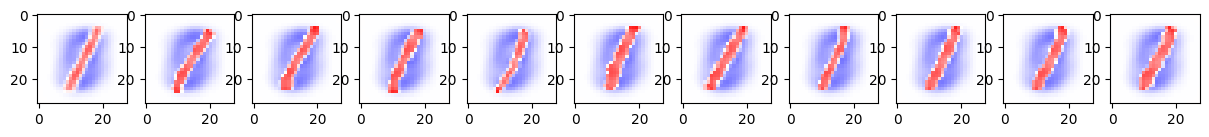

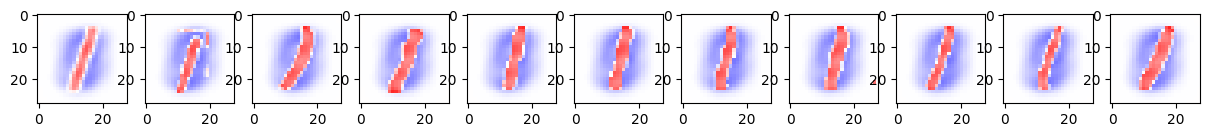

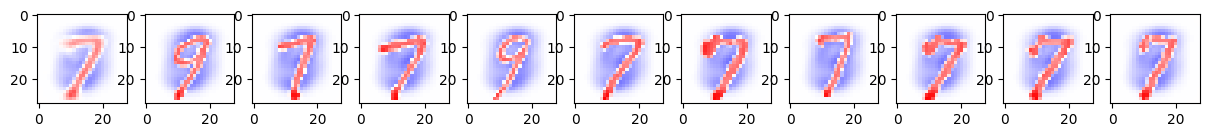

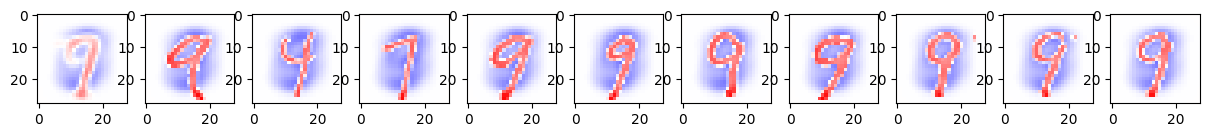

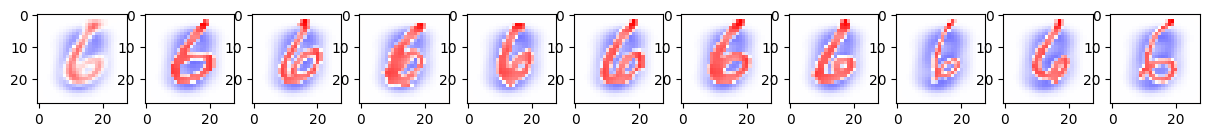

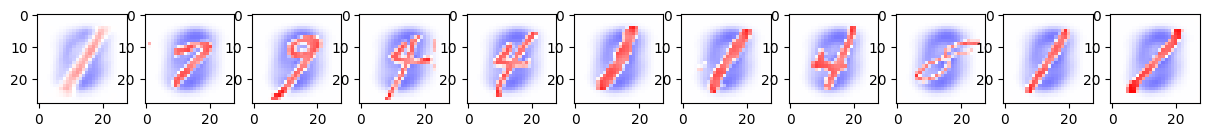

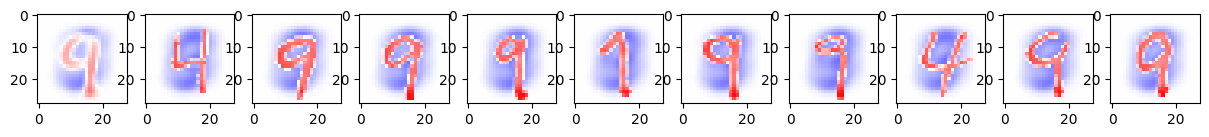

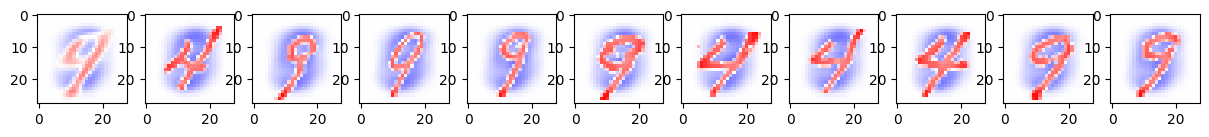

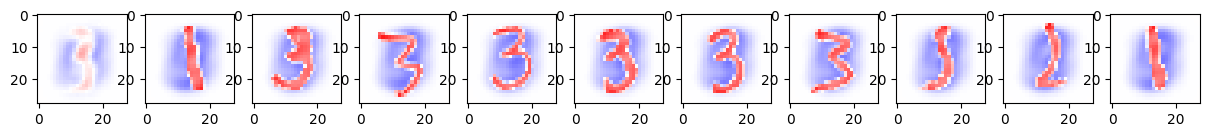

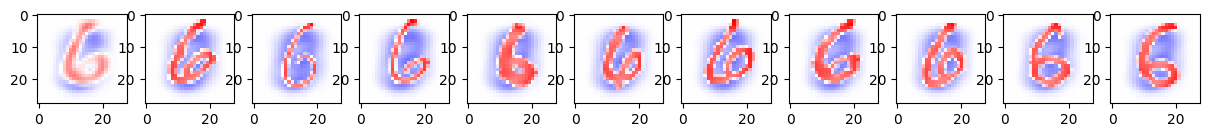

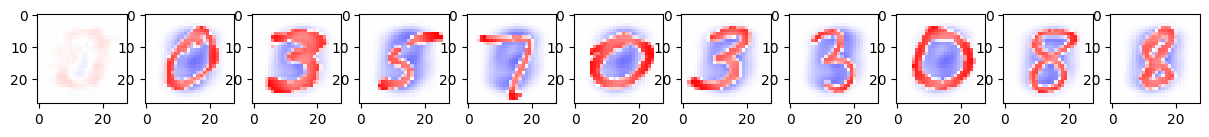

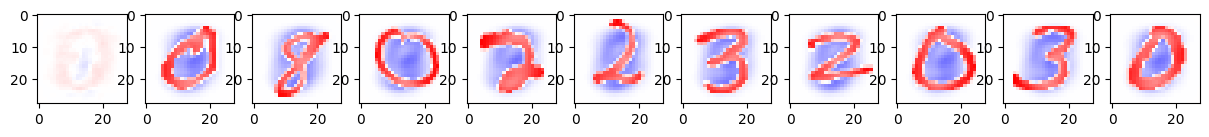

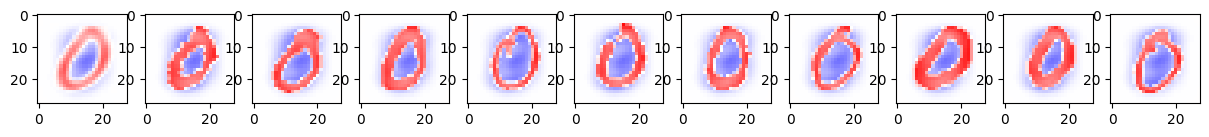

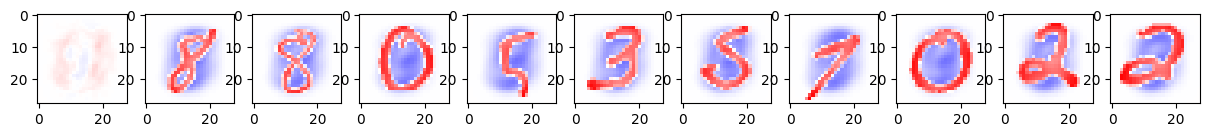

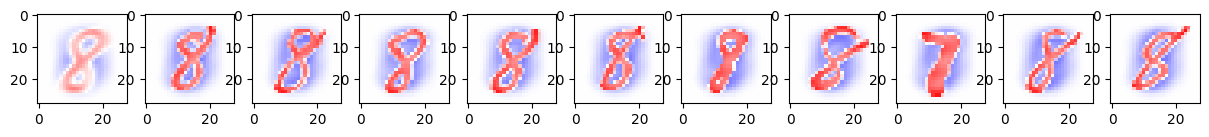

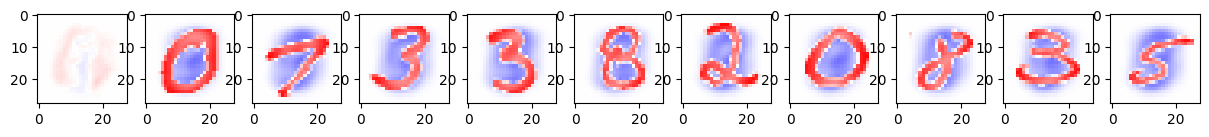

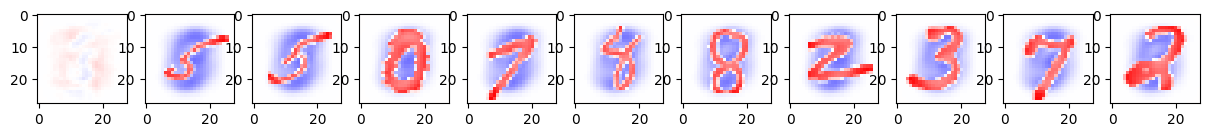

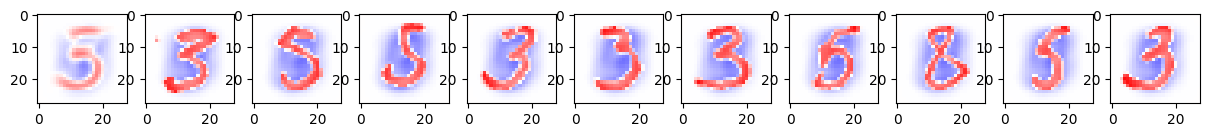

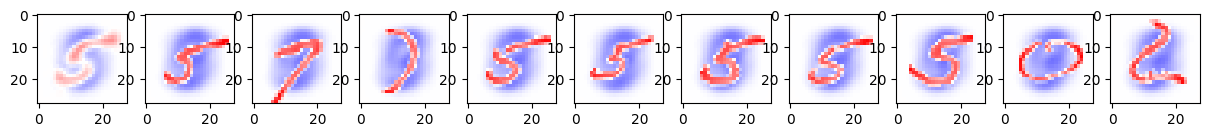

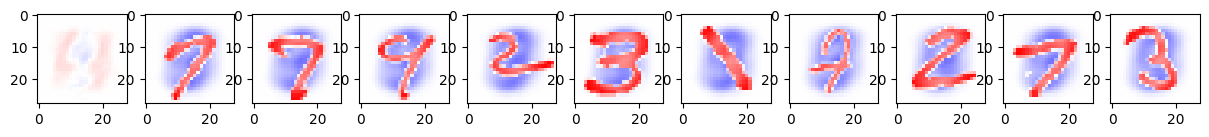

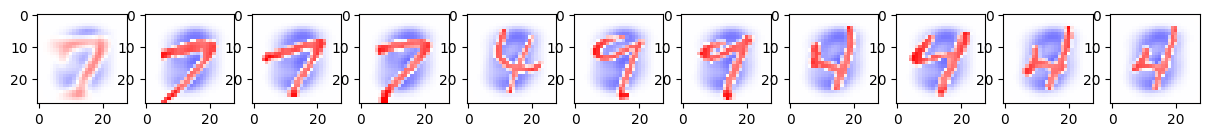

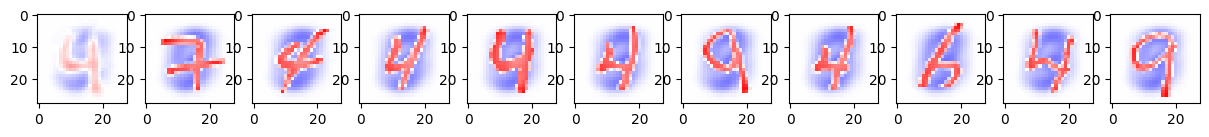

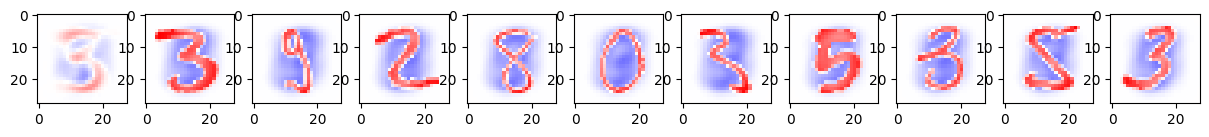

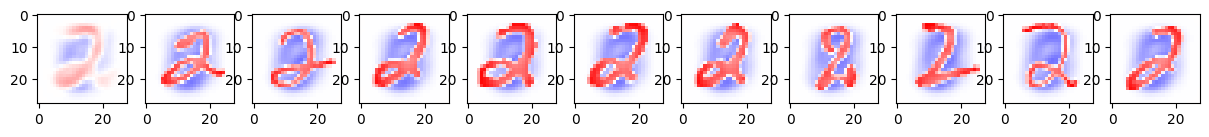

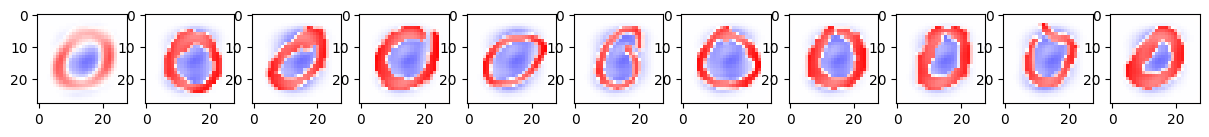

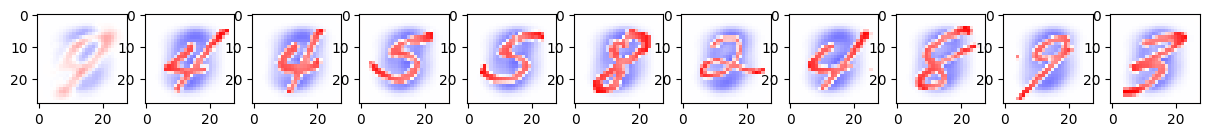

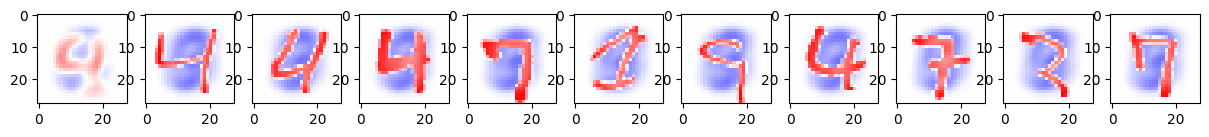

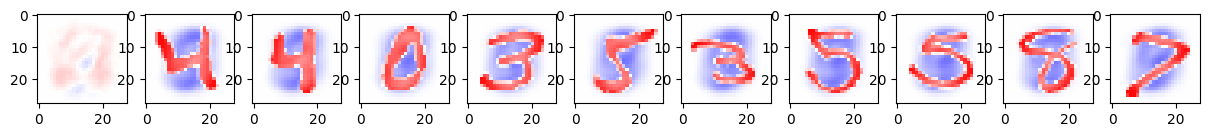

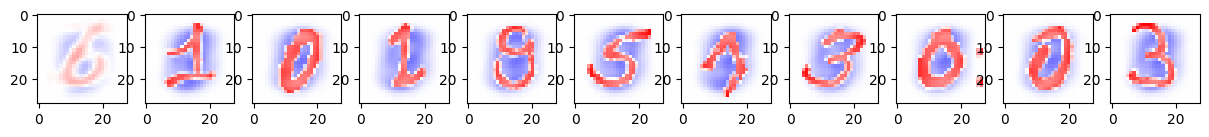

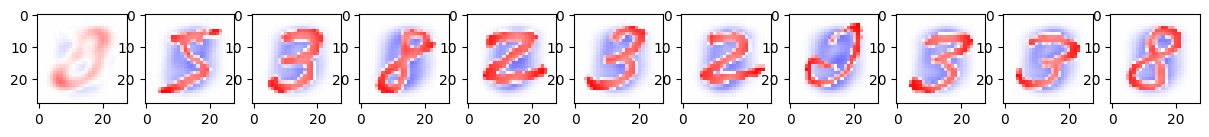

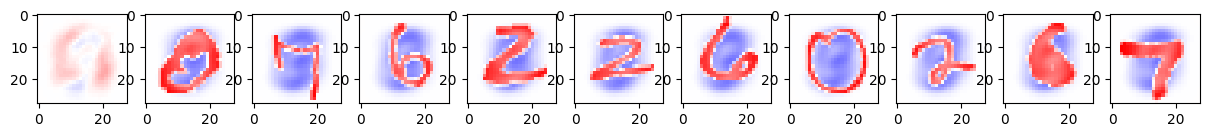

In [ ]:
for c in np.unique(clusters):
  indices = np.where(clusters == c)[0]
  plt.figure(figsize=(20,4))
  plt.title("Cluster " + str(c))
  plt.subplot(1,12,1)
  plt.imshow(x_train[indices].mean(axis=0), cmap="bwr", vmin=-1, vmax=1)
  for i in range(10):
    plt.subplot(1,12,i+3)
    plt.imshow(x_train[indices][i], cmap="bwr", vmin=-1, vmax=1)
  plt.show()